[View in Colaboratory](https://colab.research.google.com/github/janchorowski/nn_assignments/blob/nn18/assignment2/Assignment2.ipynb)

# Assignment 2

**Updated Submission deadline:**
- **Problems 1-4: last lab session before or on Friday 26.10.18**
- **Problems 5-8: last lab session before or on Friday 01.11.18**

**Points: 16 + 3 bonus points**


## Downloading this notebook

This assignment is an Colab/Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments or open from Colab. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

# Problem 1 [2p] Bayes' Theorem

Bayes' theorem allows to reason about conditional probabilities of causes and their effects:

\begin{equation}
p(A,B)=p(A|B)p(B)=p(B|A)p(A)
\end{equation}

\begin{equation}
p(A|B) = \frac{p(B|A)p(A)}{p(B)}
\end{equation}

Bayes' theorem allows us to reason about probabilities of causes, when
we observe their results.  Instead of directly answering the hard
question $p(\text{cause}|\text{result})$ we can instead separately
work out the marginal probabilities of causes $p(\text{cause})$ and
carefully study their effects $p(\text{effect}|\text{cause})$.

Solve the following using Bayes' theorem.

1. **[1p]** There are two boxes on the table: box \#1 holds two
  black balls and eight red ones, box \#2 holds 5 black ones and
  5 red ones. We pick a box at random (with equal probabilities),
  and then a ball from that box.
  1. What is the probability, that the
  ball came from box \#1 if we happened to pick a red ball?
  
1. **[1p]** The government has started a preventive program of
  mandatory tests for the Ebola virus. Mass testing method is
  imprecise, yielding 1% of false positives (healthy, but the test
  indicates the virus) and 1% of false negatives (
  having the virus but healthy according to test results).
  As Ebola is rather infrequent, lets assume that it occurs in
  one in a million people in Europe.
  1. What is the probability,
  that a random European, who has been tested positive for Ebola
  virus, is indeed a carrier?
  2. Suppose we have an additional information, that the person has just
  arrived from a country where one in a thousand people is a carrier.
  How much will be the increase in probability?
  3. How accurate should be the test, for a 80% probability of true
  positive in a European?

In [1]:
# TODO Fill in the calculations instead of doing them by hand
# TODO Be precise and remember to add comments!

box_1_black = 2.
box_1_red = 8.
box_1 = box_1_black + box_1_red
box_2_black = 5.
box_2_red = 5.
box_2 = box_2_black + box_2_red
total_box = box_1 + box_2

p_box_1 = box_1 / total_box
p_red = (box_1_red + box_2_red) / total_box
p_red_if_box_1 = box_1_red / box_1
p_box_1_if_red = p_red_if_box_1 * p_box_1 / p_red

print('1.A) %s' % p_box_1_if_red)

In [2]:
p_false_positive = p_positive_if_healthy = 0.01
p_true_positive = p_positive_if_carrier = 1 - p_false_positive
p_false_negative = p_negative_if_carrier = 0.01
p_true_negative = p_negative_if_healthy = 1 - p_false_negative


def p_carrier_if_positive(p_carrier):
    p_healthy = 1 - p_carrier
    p_positive = p_positive_if_carrier * p_carrier + p_positive_if_healthy * p_healthy

    p_carrier_if_positive = p_positive_if_carrier * p_carrier / p_positive
    return p_carrier_if_positive

# 2.A)
p_european_carrier = 1e-6
p_european_carrier_if_positive = p_carrier_if_positive(p_european_carrier)
print('2.A) European carrier if positive: %g' % p_european_carrier_if_positive)

# 2.B)
p_foreign_carrier = 1e-3
p_foreign_carrier_if_positive = p_carrier_if_positive(p_foreign_carrier)
print('2.B) Foreign carrier if positive: %g\tdifference: %g' % (
    p_foreign_carrier_if_positive,
    p_foreign_carrier_if_positive - p_european_carrier_if_positive)) 

# 2.C
def ex2C():
    p_carrier = p_european_carrier
    p_positive_if_carrier = 0.8
    
    accuracy = (
        p_positive_if_carrier * (p_carrier - 1)
        / (2 * p_positive_if_carrier * p_carrier - p_positive_if_carrier - p_carrier)
    )
    return accuracy

print('2.C) Accuracy: %.9f' % ex2C())

# Problem 2 [2p + 1b] Naive Bayes Classifier

The Bayes' theorem allows us to construct a classifier in which we
model how the data is generated. Here we will describe a
simple and popular example of such a classifier called the naive
Bayes classifier.  Despite its simplicity It is quite effective for
classification of text documents (e.g. as spam and non-spam).

Let a document be a sequence of words $D=W_1,W_2,\ldots,W_n$ 
We will model generation of text documents as a two-stage process.
First, document category $C_j$ is drawn at random with probability
$p(C_j)$, also called the *a priori* probability.
To define the class-conditional probability
$p(D|C_j)$, we will make a simplifying (naive)
assumption, that every word in the document is drawn independently at
random with probability $p(W_i|C)$:

\begin{equation*}
  p(D|C_j) = p(W_1,W_2,\ldots,W_n | C_j) \approx p(W_1|C_j)p(W_2|C_j)\ldots p(W_n|C_j).
\end{equation*}

To infer the class of a document we apply the Bayes theorem:
\begin{equation*}   p(C_j|D) = \frac{p(D|C_j)p(C_j)}{p(D)} = \frac{p(C_j)p(W_1|C_j)p(W_2|C_j)\ldots p(W_n|C_j)}{p(D)}.
\end{equation*}
Please note that since we assumed only a finite number of classes,
we can compute the term $p(D)$ by making sure that the *a
posteriori probabilities* $p(C_j|D)$ sum to $1$ over all classes.

In this exercise we will try to mimic the language-guessing feature
of [Google Translate](https://translate.google.com/), although
on a much smaller scale.  We are given an input which is a
lower-case sequence of characters (such as *"some people like
pineapple on their pizza"*), and we determine whether the
sequence's language is English, Polish or Spanish.
We will treat each character as a separate observation.
The numbers are taken from [Wikipedia article on letter frequency](https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_letters_in_other_languages). We display the first few rows:

In [3]:
import pandas as pd
from io import StringIO

wiki_table = u"""English|French|German|Spanish|Portuguese|Esperanto|Italian|Turkish|Swedish|Polish|Dutch|Danish|Icelandic|Finnish|Czech\na|8.167|7.636|6.516|11.525|14.634|12.117|11.745|12.920|9.383|10.503|7.486|6.025|10.110|12.217|8.421\nb|1.492|0.901|1.886|2.215|1.043|0.980|0.927|2.844|1.535|1.740|1.584|2.000|1.043|0.281|0.822\nc|2.782|3.260|2.732|4.019|3.882|0.776|4.501|1.463|1.486|3.895|1.242|0.565|0|0.281|0.740\nd|4.253|3.669|5.076|5.010|4.992|3.044|3.736|5.206|4.702|3.725|5.933|5.858|1.575|1.043|3.475\ne|12.702|14.715|16.396|12.181|12.570|8.995|11.792|9.912|10.149|7.352|18.91|15.453|6.418|7.968|7.562\nf|2.228|1.066|1.656|0.692|1.023|1.037|1.153|0.461|2.027|0.143|0.805|2.406|3.013|0.194|0.084\ng|2.015|0.866|3.009|1.768|1.303|1.171|1.644|1.253|2.862|1.731|3.403|4.077|4.241|0.392|0.092\nh|6.094|0.737|4.577|0.703|0.781|0.384|0.636|1.212|2.090|1.015|2.380|1.621|1.871|1.851|1.356\ni|6.966|7.529|6.550|6.247|6.186|10.012|10.143|9.600|5.817|8.328|6.499|6.000|7.578|10.817|6.073\nj|0.153|0.613|0.268|0.493|0.397|3.501|0.011|0.034|0.614|1.836|1.46|0.730|1.144|2.042|1.433\nk|0.772|0.049|1.417|0.011|0.015|4.163|0.009|5.683|3.140|2.753|2.248|3.395|3.314|4.973|2.894\nl|4.025|5.456|3.437|4.967|2.779|6.104|6.510|5.922|5.275|2.564|3.568|5.229|4.532|5.761|3.802\nm|2.406|2.968|2.534|3.157|4.738|2.994|2.512|3.752|3.471|2.515|2.213|3.237|4.041|3.202|2.446\nn|6.749|7.095|9.776|6.712|4.446|7.955|6.883|7.987|8.542|6.237|10.032|7.240|7.711|8.826|6.468\no|7.507|5.796|2.594|8.683|9.735|8.779|9.832|2.976|4.482|6.667|6.063|4.636|2.166|5.614|6.695\np|1.929|2.521|0.670|2.510|2.523|2.755|3.056|0.886|1.839|2.445|1.57|1.756|0.789|1.842|1.906\nq|0.095|1.362|0.018|0.877|1.204|0|0.505|0|0.020|0|0.009|0.007|0|0.013|0.001\nr|5.987|6.693|7.003|6.871|6.530|5.914|6.367|7.722|8.431|5.243|6.411|8.956|8.581|2.872|4.799\ns|6.327|7.948|7.270|7.977|6.805|6.092|4.981|3.014|6.590|5.224|3.73|5.805|5.630|7.862|5.212\nt|9.056|7.244|6.154|4.632|4.336|5.276|5.623|3.314|7.691|2.475|6.79|6.862|4.953|8.750|5.727\nu|2.758|6.311|4.166|2.927|3.639|3.183|3.011|3.235|1.919|2.062|1.99|1.979|4.562|5.008|2.160\nv|0.978|1.838|0.846|1.138|1.575|1.904|2.097|0.959|2.415|0.012|2.85|2.332|2.437|2.250|5.344\nw|2.360|0.074|1.921|0.017|0.037|0|0.033|0|0.142|5.813|1.52|0.069|0|0.094|0.016\nx|0.150|0.427|0.034|0.215|0.253|0|0.003|0|0.159|0.004|0.036|0.028|0.046|0.031|0.027\ny|1.974|0.128|0.039|1.008|0.006|0|0.020|3.336|0.708|3.206|0.035|0.698|0.900|1.745|1.043\nz|0.074|0.326|1.134|0.467|0.470|0.494|1.181|1.500|0.070|4.852|1.39|0.034|0|0.051|1.503\nà|0|0.486|0|0|0.072|0|0.635|0|0|0|0|0|0|0|0\nâ|0|0.051|0|0|0.562|0|0|0|0|0|0|0|0|0|0\ná|0|0|0|0.502|0.118|0|0|0|0|0|0|0|1.799|0|0.867\nå|0|0|0|0|0|0|0|0|1.338|0|0|1.190|0|0.003|0\nä|0|0|0.578|0|0|0|0|0|1.797|0|0|0|0|3.577|0\nã|0|0|0|0|0.733|0|0|0|0|0|0|0|0|0|0\ną|0|0|0|0|0|0|0|0|0|0.699|0|0|0|0|0\næ|0|0|0|0|0|0|0|0|0|0|0|0.872|0.867|0|0\nœ|0|0.018|0|0|0|0|0|0|0|0|0|0|0|0|0\nç|0|0.085|0|0|0.530|0|0|1.156|0|0|0|0|0|0|0\nĉ|0|0|0|0|0|0.657|0|0|0|0|0|0|0|0|0\nć|0|0|0|0|0|0|0|0|0|0.743|0|0|0|0|0\nč|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.462\nď|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.015\nð|0|0|0|0|0|0|0|0|0|0|0|0|4.393|0|0\nè|0|0.271|0|0|0|0|0.263|0|0|0|0|0|0|0|0\né|0|1.504|0|0.433|0.337|0|0|0|0|0|0|0|0.647|0|0.633\nê|0|0.218|0|0|0.450|0|0|0|0|0|0|0|0|0|0\në|0|0.008|0|0|0|0|0|0|0|0|0|0|0|0|0\nę|0|0|0|0|0|0|0|0|0|1.035|0|0|0|0|0\ně|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1.222\nĝ|0|0|0|0|0|0.691|0|0|0|0|0|0|0|0|0\nğ|0|0|0|0|0|0|0|1.125|0|0|0|0|0|0|0\nĥ|0|0|0|0|0|0.022|0|0|0|0|0|0|0|0|0\nî|0|0.045|0|0|0|0|0|0|0|0|0|0|0|0|0\nì|0|0|0|0|0|0|0.030|0|0|0|0|0|0|0|0\ní|0|0|0|0.725|0.132|0|0|0|0|0|0|0|1.570|0|1.643\nï|0|0.005|0|0|0|0|0|0|0|0|0|0|0|0|0\nı|0|0|0|0|0|0|0|5.114|0|0|0|0|0|0|0\nĵ|0|0|0|0|0|0.055|0|0|0|0|0|0|0|0|0\nł|0|0|0|0|0|0|0|0|0|2.109|0|0|0|0|0\nñ|0|0|0|0.311|0|0|0|0|0|0|0|0|0|0|0\nń|0|0|0|0|0|0|0|0|0|0.362|0|0|0|0|0\nň|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.007\nò|0|0|0|0|0|0|0.002|0|0|0|0|0|0|0|0\nö|0|0|0.443|0|0|0|0|0.777|1.305|0|0|0|0.777|0.444|0\nô|0|0.023|0|0|0.635|0|0|0|0|0|0|0|0|0|0\nó|0|0|0|0.827|0.296|0|0|0|0|1.141|0|0|0.994|0|0.024\nõ|0|0|0|0|0.040|0|0|0|0|0|0|0|0|0|0\nø|0|0|0|0|0|0|0|0|0|0|0|0.939|0|0|0\nř|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.380\nŝ|0|0|0|0|0|0.385|0|0|0|0|0|0|0|0|0\nş|0|0|0|0|0|0|0|1.780|0|0|0|0|0|0|0\nś|0|0|0|0|0|0|0|0|0|0.814|0|0|0|0|0\nš|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.688\nß|0|0|0.307|0|0|0|0|0|0|0|0|0|0|0|0\nť|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.006\nþ|0|0|0|0|0|0|0|0|0|0|0|0|1.455|0|0\nù|0|0.058|0|0|0|0|0.166|0|0|0|0|0|0|0|0\nú|0|0|0|0.168|0.207|0|0|0|0|0|0|0|0.613|0|0.045\nû|0|0.060|0|0|0|0|0|0|0|0|0|0|0|0|0\nŭ|0|0|0|0|0|0.520|0|0|0|0|0|0|0|0|0\nü|0|0|0.995|0.012|0.026|0|0|1.854|0|0|0|0|0|0|0\nů|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.204\ný|0|0|0|0|0|0|0|0|0|0|0|0|0.228|0|0.995\nź|0|0|0|0|0|0|0|0|0|0.078|0|0|0|0|0\nż|0|0|0|0|0|0|0|0|0|0.706|0|0|0|0|0\nž|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.721"""
df = pd.read_table(StringIO(wiki_table), sep='|', index_col=0)
df.head()

,English,French,German,Spanish,Portuguese,Esperanto,Italian,Turkish,Swedish,Polish,Dutch,Danish,Icelandic,Finnish,Czech
a,8.167,7.636,6.516,11.525,14.634,12.117,11.745,12.920,9.383,10.503,7.486,6.025,10.110,12.217,8.421
b,1.492,0.901,1.886,2.215,1.043,0.980,0.927,2.844,1.535,1.740,1.584,2.000,1.043,0.281,0.822
c,2.782,3.260,2.732,4.019,3.882,0.776,4.501,1.463,1.486,3.895,1.242,0.565,0.000,0.281,0.740
d,4.253,3.669,5.076,5.010,4.992,3.044,3.736,5.206,4.702,3.725,5.933,5.858,1.575,1.043,3.475
e,12.702,14.715,16.396,12.181,12.570,8.995,11.792,9.912,10.149,7.352,18.910,15.453,6.418,7.968,7.562


Implement the language classifier and answer the following:

1. **[0.5p]** Naive Bayes can be implemented
    either by multiplying probabilities or by adding
    log-probabilities. Which one is better and why?
2. **[1.5p]** What is the language of the following phrases, according to the classifier (below in a code cell)? Assume equal prior language probabilities $P(C)$.
3. **[0-1 bonus]** What happens when a Naive Bayes classifier
      is applied to a document with out-of-vocabulary words? Propose
      some solutions. Relate them to the concept of Bayesian
      priors discussed during the lecture.

Ad.1. Summing many probabilities can lead to issues with precision in the case of the `multiplication`. The `log-pobabilities` is much more resistant to such problems.

Ad.3. If we encounter `out-of-vocabulary` word we will have a problem with _mocking_ its probability.
We can:
- ignore it, especialy if we use the `log-probabilities`,
- compute some `penalty-probability` (especially necessary in the case of the `multiplicative-probability`),

In [4]:
sentences = [
    u"No dejes para mañana lo que puedas hacer hoy.",
    u"Przed wyruszeniem w drogę należy zebrać drużynę.",
    u"Żeby zrozumieć rekurencję, należy najpierw zrozumieć rekurencję.",
    u"Si vale la pena hacerlo vale la pena hacerlo bien.",
    u"Experience is what you get when you didn't get what you wanted.",
    u"Należy prowokować intelekt, nie intelektualistów."]

In [5]:
import numpy as np


# We can easily access the data.
langs = list(df)
letters = list(df.index)
print('Languages:', ','.join(langs))
print('Letters:', ', '.join(letters))
print('P(ę|Polish) =', df.loc['ę', 'Polish'])

# Normalize values to a probability distribution
df_norm = df.divide(df.values.sum(0) * len(langs))
print(df_norm.values.sum(0))

MIN_VALUE = df_norm.values[df_norm.values > 0].min() / 10
LETTERS_SET = set(letters)


def get_cleaned_letters(text):
    return LETTERS_SET.intersection(set(text))


def naive_bayes(sent, langs, df_norm):
    """Returns the most probable language of a sentence"""
    probabilities = np.zeros(len(langs))
    sent_letters = get_cleaned_letters(sent)

    for letter in sent_letters:
        letter_probs = df_norm.loc[letter, langs]
        # If letter doesn't occur in the language (== 0) the "log(0)"
        # would return "-inf". Changing it to a pre-computed "MIN_VALUE"
        letter_probs[letter_probs == 0] = MIN_VALUE
        probabilities += np.log(letter_probs)

    return np.argmax(probabilities)


for sent in sentences:
    print(naive_bayes(sent, langs, df_norm), ':', sent)

Languages: English,French,German,Spanish,Portuguese,Esperanto,Italian,Turkish,Swedish,Polish,Dutch,Danish,Icelandic,Finnish,Czech
Letters: a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, à, â, á, å, ä, ã, ą, æ, œ, ç, ĉ, ć, č, ď, ð, è, é, ê, ë, ę, ě, ĝ, ğ, ĥ, î, ì, í, ï, ı, ĵ, ł, ñ, ń, ň, ò, ö, ô, ó, õ, ø, ř, ŝ, ş, ś, š, ß, ť, þ, ù, ú, û, ŭ, ü, ů, ý, ź, ż, ž
P(ę|Polish) = 1.035
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
Spanish : No dejes para mañana lo que puedas hacer hoy.
Polish : Przed wyruszeniem w drogę należy zebrać drużynę.
Polish : Żeby zrozumieć rekurencję, należy najpierw zrozumieć rekurencję.
Italian : Si vale la pena hacerlo vale la pena hacerlo bien.


/home/derenio/.virtualenvs/nn_assignments/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


English : Experience is what you get when you didn't get what you wanted.
Polish : Należy prowokować intelekt, nie intelektualistów.


# Problem 3 [2p]
Given observations $x_1,\ldots,x_n$
  coming from a certain distribution,
  prove that MLE of a particular parameter of that distribution is equal to the sample mean $\frac{1}{n}\sum_{i=1}^n x_i$:
1. Bernoulli distribution with success probability $p$ and MLE $\hat{p}$,
2. Gaussian distribution $\mathcal{N}(\mu,\sigma)$ and MLE $\hat{\mu}$,
3. Poisson distribution $\mathit{Pois}(\lambda)$ and MLE $\hat{\lambda}$.

*NOTE: You can submit your solution on paper. To freeze the solution and spend late days, at minimum send a photo of your solution via e-mail.*

1.
argmax(p) Bern(p) = ?
```
ln P(k | n, p) =
ln(nCk * p^k * (1 - p)^(n - k)) =
k * ln(p) + (n - k) * ln(1 - p)

(k * ln(p) + (n - k) * ln (1 - p)) δ/δp = 0
k/p + (n - k)/(1 - p) = 0

p = k/n and k = Σ(i=1, n)(xi)
```
2.
https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Continuous_distribution,_continuous_parameter_space

argmax(μ) N(μ, σ) = ?
```
ln f(x1, ..., xn | μ, σ) =
ln(Π(i=1, n)(f(xi | μ, σ)) =
ln(Π(i=1, n)((1/2πσ^2)^(n/2) * exp(-(Σ(i=1, n)(xi - μ)^2)/(2 * σ^2)) =
c * Σ(i=1, n)(xi - μ)^2

c * Σ(i=1, n)(xi - μ)^2 δ/δμ = 0
Σ(i=1, n)(xi - μ) = 0
Σ(i=1, n)(xi) - n * μ = 0

μ = 1/n * Σ(i=1, n)(xi)
```
3.
argmax(μ) Pois(λ) = ?
```
ln(Π(i=1, n)(f(xi | μ, σ)) =
ln(Π(i=1, n)((λ^x * exp(-λ))/x!) =
ln(λ) * (Σ(i=1, n)(xi) - Σ(i=1, n)(λ) - Σ(i=1, n)(ln(xi!)) =
ln(λ) * (Σ(i=1, n)(xi) - n * λ - Σ(i=1, n)(ln(xi!))

ln(λ) * (Σ(i=1, n)(xi) - n * λ - Σ(i=1, n)(ln(xi!)) δ/δλ = 0
1/λ * (Σ(i=1, n)(xi) - n - 0 = 0
1/λ * (Σ(i=1, n)(xi) = n

λ = 1/n * Σ(i=1, n)(xi)
```

# Problem 4: Simple Kalman filtering [3p + 2b]

Oh no, someone has kidnapped you! You feel that you are in the trunk of a moving car. Luckily, you have your phone with GPS. Unfortunately, the GPS is noisy. You want to combine your estimate of your location by combining your prior belief about where you can be with the noisy GPS. You set out to implement a [1D Kalman filter](https://en.wikipedia.org/wiki/Kalman_filter).

Problem setup:
- your prior belief about the location is a Gaussian with mean 0 and some initial standard deviation $\mathcal{N}(0, \sigma_i)$
- the car moves in a brownian motion - each time step, it changes location by a normally distributed random amound sampled from $\mathcal{N}(0, \sigma_m)$
- each time step, you get a GPS reading which is sampled around your true (and sadly unknown to you ) location from $\mathcal{N}(\text{true loc}, \sigma_g)$

You want to use the following algorithm to track your location:

1. Initially, the PDF of your location is $p(x) = \mathcal{N}(x; \mu_l=0, \sigma_l=\sigma_i)$
2. For each time step, you update your belief about your location:
    1. $p(x)$ is updated due to according to the car movement distribution
    2. you use the Bayes formula to incorporate the GPS readout:
       $$
      p(x|\text{GPS readout}) = \frac{p(\text{GPS readout}|x)p(x)}
                                                           {p(\text{GPS readout})}
      $$
    3. you set $p(x) \gets p(x|\text{GPS readout})$ to be your prior belief about your locatin used during the next iteration.


NB: the GPS is actually very noisy, and Kalman filters are routinely used to fuse information from the GPS, accelerometers and odometry in practical applications, such as GPS navigation.

#### Problem [1p]

What is thePDF of
$$
p(x) = \mathcal{N}(x;\mu_1, \sigma_1)\mathcal{N}(x;\mu_2, \sigma_2)
$$

Hint: what disrtibution will the PDF belong to? Maybe you can simply compute the new mean and standard deviation?

#### Problem [.5p]

Implement below a simulator for your kidnapping, then fill in the code for plotting the true location and GPS readouts over time.

#### Problem [1.5p]

Implement a 1D Kalman filer using the algorithm stated above: maintian a probability distribution over your location, then at each timestep update it to account for car movement and GPS readouts.

Plot the estimated location along with its standard deviation against the true location from the simluator.

Experiemt with different setting for the standard deviations of the car's motion and the GPS. What happens if the simulator and the Kalman filter use different probability distributions?

#### Problem [2p bonus]

Suppose the car has a velocity, which is updated at each time step:
$$
\begin{split}
v &\gets v + \mathcal{N}(0, \sigma_v) \\
x &\gets x + v \\
\text{GPS readout} &= \mathcal{N}(x, \sigma_g) 
\end{split}
$$

Update the Kalman filter code to track both the car's location and velocity. You cna assume that the initial velocity is 0.

https://math.stackexchange.com/posts/1112866/edit

The product of two Gaussian distributions is a Gaussian distributions with the following $\mu$ and $\sigma$:

$N(\mu_1, \sigma_1^2)\times N(\mu_2, \sigma_2^2) = N(\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1}{\sigma_1^2 + \sigma_2^2},\frac{1}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}})$

### Proof:

http://www.tina-vision.net/docs/memos/2003-003.pdf

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_style('whitegrid')

from scipy.stats import norm

In [7]:
def simulate(initial_sigma, motion_sigma, gps_sigma, n_steps):
    # This is the true (unknonw) location
    x = norm.rvs(0, initial_sigma)
    loc_hist = []
    for s in range(n_steps):
        #
        # TODO: fill in a simulation step
        #
        gps_readout = norm.rvs(x, gps_sigma)
        loc_hist.append((x, gps_readout))
        x += norm.rvs(0, motion_sigma)
    loc_df = pd.DataFrame(loc_hist, columns=['x', 'gps'])
    return loc_df


def kalman_predict(loc_df, initial_sigma, motion_sigma, gps_sigma):
    prior_mu = 0
    prior_sigma = initial_sigma
    predictions = []
    for gps_readout in loc_df.gps:
        # expand the prior by the movement 
        #
        # TODO: fill in
        #

        posterior_mu = prior_mu
        posterior_sigma = prior_sigma + motion_sigma

        # now do the bayes update
        #
        # TODO: fill in a simulation step
        #

        posterior_mu = (
            posterior_mu * gps_sigma + gps_readout * posterior_sigma
        ) / (
            posterior_sigma + gps_sigma
        )
        posterior_sigma = posterior_sigma * gps_sigma / (posterior_sigma + gps_sigma)

        predictions.append((posterior_mu, posterior_sigma))
        prior_mu = posterior_mu
        prior_sigma = posterior_sigma
        

    predictions_df = pd.DataFrame(predictions, columns=['mu', 'sigma'])
    return predictions_df

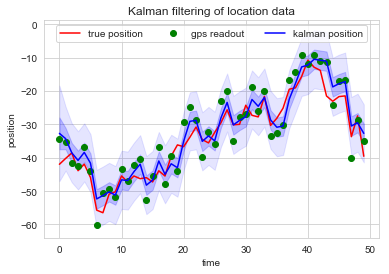

In [8]:
#@title Parametry symulacji
initial_sigma = 100 #@param
motion_sigma = 4 #@param
gps_sigma = 5 #@param
n_steps = 50 #@param


k_initial_sigma = initial_sigma
k_motion_sigma = motion_sigma
k_gps_sigma = gps_sigma

loc_df = simulate(initial_sigma, motion_sigma, gps_sigma, n_steps)
predictions_df = kalman_predict(loc_df, k_initial_sigma, k_motion_sigma, k_gps_sigma)
plt.plot(loc_df.x, 'r', label='true position')
plt.plot(loc_df.gps, 'go', label='gps readout')
plt.plot(predictions_df.mu, 'b', label='kalman position')
plt.fill_between(range(len(predictions_df)),
                 predictions_df.mu + predictions_df.sigma,
                 predictions_df.mu - predictions_df.sigma, color='b', alpha=0.2)
plt.fill_between(range(len(predictions_df)),
                 predictions_df.mu + 3 * predictions_df.sigma,
                 predictions_df.mu - 3 * predictions_df.sigma, color='b', alpha=0.1)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), frameon=True)
plt.xlabel('time')
plt.ylabel('position')
plt.title('Kalman filtering of location data')
None

The variation of the error of Kalman filtering raises with greater `standard deviations` than the simulation. Although, it keeps the track of the true position eventually following its main course.

# Problem 5 [2p]
If possible, write the solutions in a markdown cell

1. Find simple expressions for the following functions' derivatives with respect to vector $\mathbf{x}$.
    1. $\tanh(\mathbf{x})$
    2. $\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{x}}}$
2. Find the following functions' gradients with respect to vector $[x, y, z]^T$:
    1. $f_1([x, y, z]^T) = x + y$
    2. $f_2([x, y, z]^T) = xy$
    3. $f_3([x, y, z]^T) = x^2y^2$
    4. $f_4([x, y, z]^T) = (x + y)^2$
    5. $f_5([x, y, z]^T) = x^4 + x^2 y z + x y^2 z + z^4$
    6. $f_6([x, y, z]^T) = e^{x + 2y}$
    7. $f_7([x, y, z]^T) = \frac{1}{x y^2}$
    8. $f_8([x, y, z]^T) = ax + by + c$
    9. $f_9([x, y, z]^T) = \tanh(ax + by + c)$

Ad.1.
1. $\tanh(\mathbf{x})\frac{\delta}{\delta(\mathbf{x})} = sech^2(\mathbf{x}) = 1 - \tanh^2(\mathbf{x})$
2. $\sigma(\mathbf{x})\frac{\delta}{\delta(\mathbf{x})} = \frac{1}{1 + e^{-\mathbf{x}}}\frac{\delta}{\delta(\mathbf{x})} = \frac{e^{-\mathbf{x}}}{(1 + e^{-\mathbf{x}})^2 }$ https://www.intmath.com/differentiation/6-derivatives-products-quotients.php

Ad.2.
1. $\nabla f_1([x, y, z]^T) = (1, 1, 0)$
2. $\nabla f_2([x, y, z]^T) = (y, x, 0)$
3. $\nabla f_3([x, y, z]^T) = (2xy^2, 2x^2y, 0)$
4. $\nabla f_4([x, y, z]^T) = (2x + 2y, 2y + 2x , 0)$
5. $\nabla f_5([x, y, z]^T) = (4x^3 + 2yzx + y^2z, x^2z + 2xyz, x^2y + xy^2 + 4z^3)$
6. $\nabla f_6([x, y, z]^T) = (e^{x + 2y}, 2e^{x + 2y} ,0)$
7. $\nabla f_7([x, y, z]^T) = (-\frac{1}{x^2 y^2}, -\frac{2}{x y^3}, 0)$
8. $\nabla f_8([x, y, z]^T) = (a, b, 0)$
9. $\nabla f_9([x, y, z]^T) = (a - a\tanh^{2}(ax + by + c), b - b\tanh^2(ax + by + c), 0)$

# Problem 6 [2p]
If possible, write the solutions in a markdown cell

Find the following functions' gradients or Jacobians with respect to vector $\mathbf{x}$, where $\mathbf{x}, \mathbf{b} \in \mathbb{R}^{n}$, $\mathbf{W} \in \mathbb{R}^{n \times n}$:

1. **[0.5p]** $\mathbf{W} \mathbf{x} + \mathbf{b}$
2. **[0.5p]** $\mathbf{x}^T \mathbf{W} \mathbf{x}$,
3. **[0.5p]** $\sigma(\mathbf{W} \mathbf{x} + \mathbf{b})$,
    with $\sigma$ applied element-wise. Hint: use the Hadamard product
    (denoted $\circ$) for element-wise matrix multiplication.
4. **[0.5p]** $-\log(S(\mathbf{x})_j)$, where $S$ is the
    softmax function
    (https://en.wikipedia.org/wiki/Softmax_function) and we are
    interested in the derivative over the $j$-th output of the
    Softmax.

1. $\nabla \mathbf{W} \mathbf{x} + \mathbf{b} = \frac{\delta(Wx + b)}{\delta(x)} = W$
2. $\nabla \mathbf{x}^T \mathbf{W} \mathbf{x} = \frac{\delta(x^TWx)}{\delta(x)} = x^TW\frac{\delta(x)}{\delta(x)} + (Wx)^T\frac{\delta(x)}{\delta(x)} = x^TW + x^TW^T = x^T(W + W^T)$
3. $\nabla \sigma(\mathbf{W} \mathbf{x} + \mathbf{b}) = \frac{\delta(\sigma(Wx + b))}{\delta(x)} = \frac{\delta(\sigma(Wx + b))}{\delta(Wx + b)} \cdot \frac{\delta(Wx + b)}{\delta(x)} = \frac{e^{-(\mathbf{Wx + b})}}{(1 + e^{-(\mathbf{Wx + b})})^2 } \cdot W$
4. $\nabla -\log(S(\mathbf{x})_j) =
\frac{\delta(-log(S(x)_j)}{\delta(x)} =
\frac{-1}{S(x)_j} \frac{\delta(S(x)_j)}{\delta(x)} =
\frac{-1}{S(x)_j} \frac{\delta(\frac{e^{x_j}}{\sum_k e^{x_k}})}{\delta(x)} =
\frac{-1}{S(x)_j} \frac{(\sum_k e^{x_k})e^{x_j} - e^{x_j}e^{x_j}}{(\sum_k e^{x_k})^2} =
\frac{-1}{S(x)_j} (S(x)_j - (S(x)_j)^2) =
S(x)_j - 1 $

For position $j$ in the $x$ vector and 0 elsewhere
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/

# Problem 7 [2p] Linear Regression

1. Implement a function generating a dataset of $n$ points
  according to the following algorithm:
  1. Draw $n$ points $x \propto U(0;10)$ (uniformly distributed on $[0,10]$).
  2. Draw $n$ points $y \propto \mathcal{N}(1+20x-1.3x^2, 7)$
    (from a Gaussian distribution with $\mu=1+20x-1.3x^2$ and $\sigma=7$).

  Prepare a dataset of 30 elements and make a scatterplot of
  the expected value $y$ in function $x$.

2. Use linear regression to fit polynomials to the
  generated dataset. Fit polynomials of degrees zero (a constant line),
  one, two and three. An easy way to do it is to transform each data
  point $x$ into a vector of its powers $[1, x, x^2, \ldots, x^m]$.

  Plot the dataset and all regression curves on one figure.

  **Note:** The name _linear regression_ signifies that the
  hypothesis is linear with respect to parameters $\Theta$.
  However, the relationship between $x$ and $y$ is not constrained
  to a linear one. In this exercise it is a polynomial one.

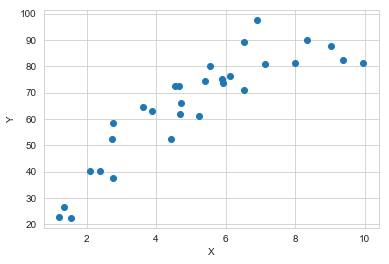

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def make_dataset(N):
    X = np.random.uniform(0, 10, N)
    Y = np.random.normal(1 + 20 * X - 1.3 * X**2, 7)
    return X, Y

data = make_dataset(30)
plt.scatter(data[0], data[1])
plt.xlabel("X")
plt.ylabel("Y")
None

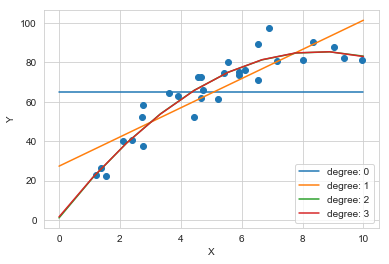

In [10]:
def powers_of_X(X, degree):
    powers = np.arange(degree + 1)[:, np.newaxis]
    return X**powers


def compute_polynomial(X, Theta):
    XP = powers_of_X(X, len(Theta) - 1) # len(Theta) x N
    Y = Theta.T @ XP
    # print(np.dstack((X, Y)))
    return Y


plot_x_space = np.linspace(0,10,10)
plt.scatter(data[0], data[1])
plt.xlabel("X")
plt.ylabel("Y")
for degree in range(4):
    X = powers_of_X(data[0], degree) # Matrix d x N
    Y = data[1][np.newaxis, :]       # Matrix 1 x N
    Theta = np.linalg.inv(X @ X.T) @ X @ Y.T
    plt.plot(plot_x_space, compute_polynomial(plot_x_space, Theta).ravel(), 
         label="degree: %d" % (degree, ))
    # print(Theta, Theta.shape)
plt.legend(loc='lower right')
None

# Problem 8 [1p]

When the data set is small and highly dimensional (or when high degree polynomials are used) the linear regression solution may fit the noise in the data instead of capturing the general rule. We call this phenomenon overfitting and will discuss it in detail in a few lectures.

One way of preventing overfitting is to force the model's parameters to be small. We call this *regularization*. Consider the following cost function:
.
$$ J(\Theta) = \sum_{i=1}^N (y^{(i)} - \Theta^T x^{(i)})^2 + \frac{\lambda}{2} \Theta^T \Theta $$

Analyze datasets sampled using the following procedure:

1. $x \propto U(0;1)$: $x$ is sampled uniformly from the  $0-1$ range.
2. $y \propto \mathcal{N}(\mu=1+2x-5x^2 + 4x^3, \sigma=0.1)$: then 
    $y$ is sampled from the Normal distribution with mean 
    $\mu=1+2x-5x^2+4x^3$ and standard deviation $0.1$

Repeat 30 times an experiment in which you sample a new training
dataset, then fit polynomials of degree 0 to 14 and use $\lambda$
value from the set $\{0, 10^{-6}, 10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}\}$.

Plot the mean training and testing errors. What is the effect of increasing $\lambda$?

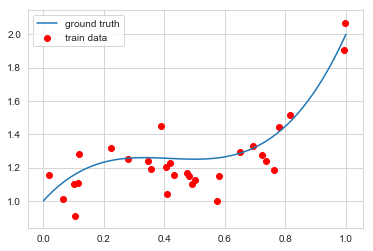

In [65]:
import matplotlib.pyplot as plt
import numpy as np


def poly_fun(X, Theta):
    """Compute the value of polynomial with coefficients Theta for points in X"""
    #
    # TODO: Write body of the function.
    # Return a vector of values in points from X (the same shape as X).
    #
    #XP = powers_of_X(X, len(Theta) - 1) # len(Theta) x N
    #return Theta.T @ XP
    return compute_polynomial(X, Theta)

#
# The true polynomial relation:
# y(x) = 1 + 2x -5x^2 + 4x^3
#
# TODO: write down the proper coefficients
#
true_poly = np.array([1., 2., -5, 4])


def make_dataset(N, theta=true_poly, sigma=0.1):
    """ Sample a dataset """
    X = np.random.rand(N)
    Y = np.random.randn(N) * sigma + poly_fun(X, theta)
    return X,Y


train_data = make_dataset(30)
XX = np.linspace(0, 1, 100)
YY = poly_fun(XX, true_poly)
plt.scatter(train_data[0], train_data[1], label='train data', color='r')
plt.plot(XX, poly_fun(XX, true_poly), label='ground truth')
plt.legend(loc='upper left')
None

In [66]:
#please note: lambda is a reserved keyword in python, thus we use _lambda
def poly_fit(data, degree, _lambda):
    "Fit a polynomial of a given degree and weight decay parameter C"
    powers = np.arange(degree + 1.0)[:, np.newaxis]
    X = data[0][np.newaxis, :]
    Y = data[1][np.newaxis, :]
    XX = X**powers
    #
    # TODO: implement the closed-form solution for Theta
    #
    # Please note that np.inv may be numerically unstable.
    # It is better to use np.linalg.solve or even a QR decomposition.
    #
    #Theta = np.linalg.inv(XX @ XX.T) @ XX @ Y.T
    
    identity = np.eye(XX.shape[0])
    Theta = np.linalg.solve(XX @ XX.T + (_lambda / 2) * identity, identity) @ XX @ Y.T
    
    return Theta

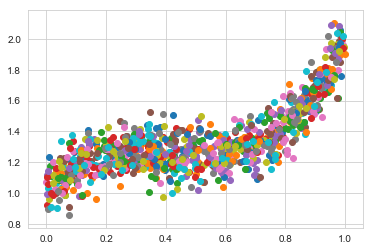

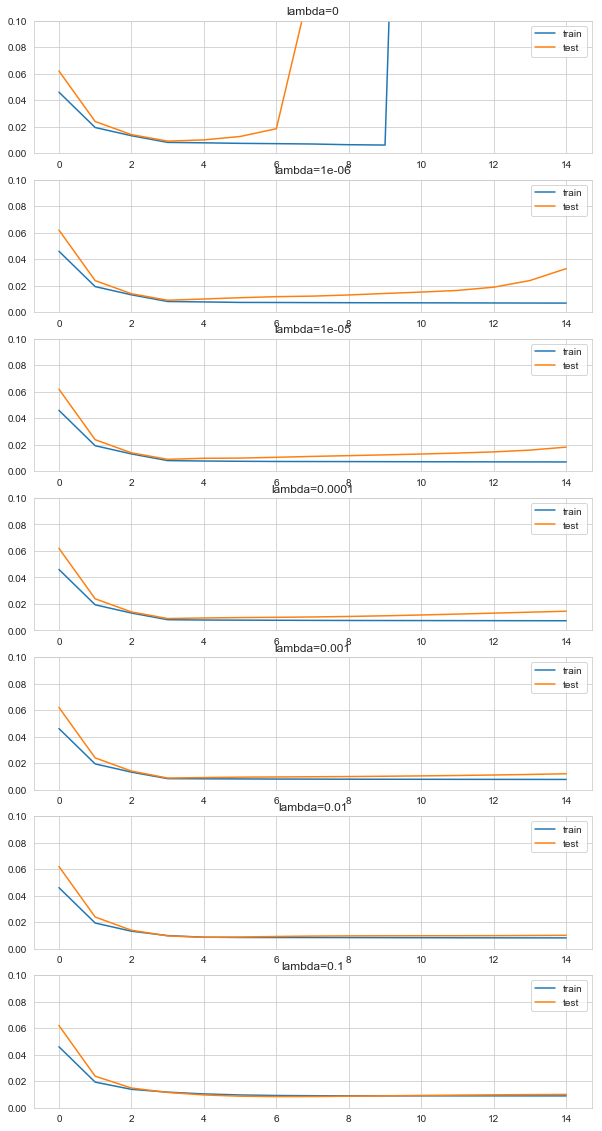

In [68]:
lambdas = [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
degrees  = np.arange(15)

num_repetitions = 30
num_samples = 30

train_errors = np.zeros((len(lambdas), len(degrees)))
test_errors = np.zeros((len(lambdas), len(degrees)))

#sample a single dataset for all experiments
test_data = make_dataset(num_samples)

for repetition in range(num_repetitions):
    #sample a new training dataset for this repetition
    train_data = make_dataset(num_samples)
    plt.scatter(train_data[0], train_data[1])
    for degree_i, degree in enumerate(degrees):
        for lambda_i, _lambda in enumerate(lambdas):
            Theta = poly_fit(train_data, degree, _lambda)
            #
            # TODO: compute the mean training and test errors
            #
            train_errors[lambda_i, degree_i] += (
                np.mean((poly_fun(train_data[0], Theta) - train_data[1])**2)
            )
            test_errors[lambda_i, degree_i] += (
                np.mean((poly_fun(test_data[0], Theta) - test_data[1])**2)
            )
train_errors /= num_repetitions
test_errors /= num_repetitions

plt.figure(figsize=(10, 20))
for lambda_i, _lambda in enumerate(lambdas):
    plt.subplot(len(lambdas), 1, lambda_i + 1)
    train_errors_i = train_errors[lambda_i, :]
    test_errors_i = test_errors[lambda_i, :]
    plt.plot(degrees, train_errors_i, label="train")
    plt.plot(degrees, test_errors_i,  label="test")
    plt.ylim(0, 0.1)
    #plt.ylim(0, np.max([np.max(train_errors_i), np.max(test_errors_i)]))
    plt.title("lambda=%g" % (_lambda,))
    plt.grid(True)
    plt.legend()